### Importing the Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
data=pd.read_excel("/content/EastWestAirlines.xlsx",sheet_name="data")

In [3]:
data.head(10)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
5,6,16420,0,1,1,1,0,0,0,0,6942,0
6,7,84914,0,3,1,1,27482,25,0,0,6994,0
7,8,20856,0,1,1,1,5250,4,250,1,6938,1
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1


# Data Preprocessing

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [5]:
data.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


### Missing values

In [6]:
data.isnull().sum()

,0
ID#,0
Balance,0
Qual_miles,0
cc1_miles,0
cc2_miles,0
cc3_miles,0
Bonus_miles,0
Bonus_trans,0
Flight_miles_12mo,0
Flight_trans_12,0


### Duplicated values

In [7]:
data[data.duplicated()]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?


## Correlation

In [ ]:
data.corr()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,1.000000,-0.243737,-0.019374,-0.224465,0.020291,-0.014707,-0.203012,-0.146915,-0.031013,-0.052096,-0.964988,-0.177901
Balance,-0.243737,1.000000,0.108722,0.338344,-0.008804,0.035243,0.403487,0.324935,0.217551,0.255700,0.263129,0.178494
Qual_miles,-0.019374,0.108722,1.000000,0.007931,-0.013923,-0.007779,0.031021,0.050725,0.126774,0.144004,0.017312,0.095256
cc1_miles,-0.224465,0.338344,0.007931,1.000000,-0.068223,0.060555,0.825200,0.608943,0.037370,0.041333,0.230849,0.335457
cc2_miles,0.020291,-0.008804,-0.013923,-0.068223,1.000000,-0.006166,-0.003969,0.064399,0.010598,0.028284,-0.005807,0.005332
cc3_miles,-0.014707,0.035243,-0.007779,0.060555,-0.006166,1.000000,0.204134,0.097313,-0.001777,-0.001117,0.010832,0.023484
Bonus_miles,-0.203012,0.403487,0.031021,0.825200,-0.003969,0.204134,1.000000,0.603180,0.183536,0.185261,0.210397,0.373506
Bonus_trans,-0.146915,0.324935,0.050725,0.608943,0.064399,0.097313,0.603180,1.000000,0.377216,0.432364,0.161262,0.333893
Flight_miles_12mo,-0.031013,0.217551,0.126774,0.037370,0.010598,-0.001777,0.183536,0.377216,1.000000,0.869193,0.037271,0.217715
Flight_trans_12,-0.052096,0.255700,0.144004,0.041333,0.028284,-0.001117,0.185261,0.432364,0.869193,1.000000,0.059260,0.247909


## Detecting the outliers using boxplots

<Axes: ylabel='Bonus_trans'>

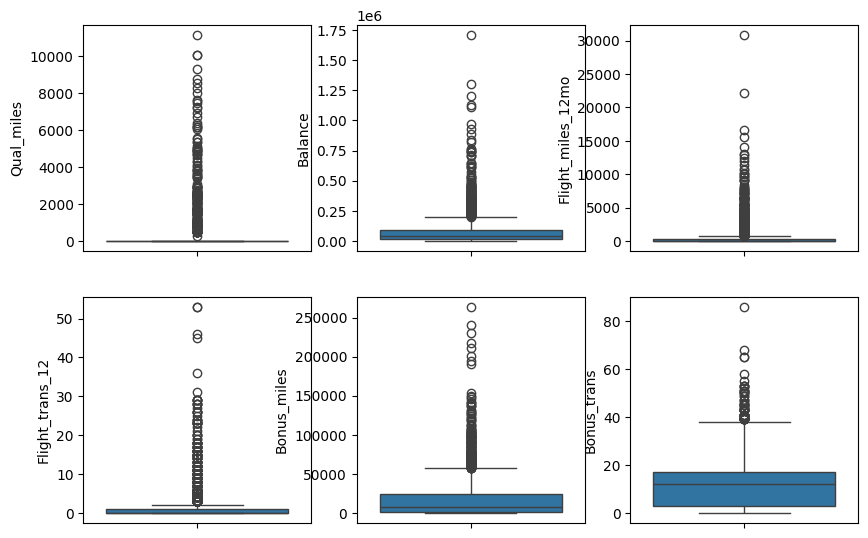

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(3,3,1)
sns.boxplot(data["Qual_miles"])
plt.subplot(3,3,2)
sns.boxplot(data["Balance"])
plt.subplot(3,3,3)
sns.boxplot(data["Flight_miles_12mo"])
plt.subplot(3,3,4)
sns.boxplot(data["Flight_trans_12"])
plt.subplot(3,3,5)
sns.boxplot(data["Bonus_miles"])
plt.subplot(3,3,6)
sns.boxplot(data["Bonus_trans"])


## Treating the outliers with IQR method

In [ ]:
iqr_bonustrans=17-3
upper_limit_bonustrans=17+1.5*iqr_bonustrans
upper_limit_bonustrans

38.0

In [ ]:
data.Bonus_trans[data["Bonus_trans"]>upper_limit_bonustrans].count()

63

In [ ]:
data.Bonus_trans[data["Bonus_trans"]>upper_limit_bonustrans]=upper_limit_bonustrans

In [ ]:
iqr_bonusmiles=23800.5-1250
upper_limit_bonusmiles=23800.5+1.5*iqr_bonusmiles
upper_limit_bonusmiles

57626.25

In [ ]:
data.Bonus_miles[data["Bonus_miles"]>upper_limit_bonusmiles].count()

280

In [ ]:
data.Bonus_miles[data["Bonus_miles"]>upper_limit_bonusmiles]=upper_limit_bonusmiles

<ipython-input-13-e414b2a7eb36>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '57626.25' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.Bonus_miles[data["Bonus_miles"]>upper_limit_bonusmiles]=upper_limit_bonusmiles


In [ ]:
data.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,15410.730683,11.470618,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,18074.733482,9.115104,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.000000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.000000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.000000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,57626.250000,38.000000,30817.000000,53.000000,8296.00000,1.000000


In [ ]:
iqr_flightmiles=311-0
upper_limit_flightmiles=311+1.5*iqr_flightmiles
upper_limit_flightmiles

777.5

In [ ]:
data.Flight_miles_12mo[data["Flight_miles_12mo"]>upper_limit_flightmiles].count()

569

In [ ]:
data.Flight_miles_12mo[data["Flight_miles_12mo"]>10000].count()

15

In [ ]:
data.drop(["ID#"],axis=1,inplace=True) #Removing unnecessary column

## Standardization

In [ ]:
stand_data=StandardScaler().fit_transform(data.values)

In [ ]:
stand_data

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [ ]:
stand_data=pd.DataFrame(stand_data,columns=data.columns)

In [ ]:
stand_data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.843091,-1.148854,-0.328603,-0.362168,1.395454,-0.766919
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.840822,-1.039133,-0.328603,-0.362168,1.379957,-0.766919
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.624581,-0.819689,-0.328603,-0.362168,1.411920,-0.766919
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.825052,-1.148854,-0.328603,-0.362168,1.372208,-0.766919
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.543191,1.594189,1.154932,0.692490,1.363975,1.303918
...,...,...,...,...,...,...,...,...,...,...,...
3994,-0.547079,-0.186299,-0.769578,-0.098242,-0.062767,-0.381007,-0.819689,-0.185750,-0.098503,-1.315120,1.303918
3995,-0.091465,-0.186299,-0.769578,-0.098242,-0.062767,-0.798437,-0.709967,-0.328603,-0.362168,-1.318994,1.303918
3996,-0.000043,-0.186299,0.683121,-0.098242,-0.062767,0.555335,-0.380802,-0.328603,-0.362168,-1.315604,1.303918
3997,-0.185607,-0.186299,-0.769578,-0.098242,-0.062767,-0.825052,-1.148854,0.028531,-0.098503,-1.316088,-0.766919


In [ ]:
stand_data.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3.999000e+03,3.999000e+03,3.999000e+03,3.999000e+03,3.999000e+03,3.999000e+03,3.999000e+03,3999.000000,3.999000e+03,3.999000e+03,3.999000e+03
mean,2.842882e-17,6.574164e-17,1.705729e-16,3.038330e-16,1.350369e-16,-2.842882e-17,2.842882e-17,0.000000,1.776801e-17,5.685763e-17,1.421441e-17
std,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125,1.000125e+00,1.000125e+00,1.000125e+00
min,-7.304396e-01,-1.862987e-01,-7.695784e-01,-9.824189e-02,-6.276658e-02,-8.527184e-01,-1.258576e+00,-0.328603,-3.621679e-01,-1.993611e+00,-7.669193e-01
25%,-5.465676e-01,-1.862987e-01,-7.695784e-01,-9.824189e-02,-6.276658e-02,-7.835524e-01,-9.294109e-01,-0.328603,-3.621679e-01,-8.661823e-01,-7.669193e-01
50%,-3.027332e-01,-1.862987e-01,-7.695784e-01,-9.824189e-02,-6.276658e-02,-4.559271e-01,5.808475e-02,-0.328603,-3.621679e-01,-1.092530e-02,-7.669193e-01
75%,1.866028e-01,-1.862987e-01,6.831212e-01,-9.824189e-02,-6.276658e-02,4.642292e-01,6.066935e-01,-0.106466,-9.850333e-02,8.097050e-01,1.303918e+00
max,1.618884e+01,1.422486e+01,2.135821e+00,1.344898e+01,2.042732e+01,2.335902e+00,2.910850e+00,21.683004,1.361205e+01,2.023095e+00,1.303918e+00


# Applying the Clustering Models

### Hierarchial Clustering with Complete Linkage

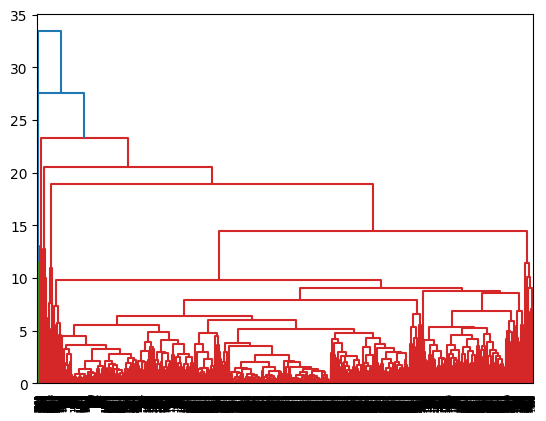

In [ ]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
dendrogram = sch.dendrogram(sch.linkage(stand_data, method='complete'))

In [ ]:
hc = AgglomerativeClustering(n_clusters=4, metric = 'euclidean', linkage = 'complete')   #Hieararchial clustering with complete linkage

In [ ]:
y_hc = hc.fit_predict(stand_data)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [ ]:
stand_data['h_clusterid'] = hc.labels_

In [ ]:
stand_data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.843091,-1.148854,-0.328603,-0.362168,1.395454,-0.766919,0
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.840822,-1.039133,-0.328603,-0.362168,1.379957,-0.766919,0
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.624581,-0.819689,-0.328603,-0.362168,1.411920,-0.766919,0
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.825052,-1.148854,-0.328603,-0.362168,1.372208,-0.766919,0
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.543191,1.594189,1.154932,0.692490,1.363975,1.303918,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,-0.547079,-0.186299,-0.769578,-0.098242,-0.062767,-0.381007,-0.819689,-0.185750,-0.098503,-1.315120,1.303918,0
3995,-0.091465,-0.186299,-0.769578,-0.098242,-0.062767,-0.798437,-0.709967,-0.328603,-0.362168,-1.318994,1.303918,0
3996,-0.000043,-0.186299,0.683121,-0.098242,-0.062767,0.555335,-0.380802,-0.328603,-0.362168,-1.315604,1.303918,0
3997,-0.185607,-0.186299,-0.769578,-0.098242,-0.062767,-0.825052,-1.148854,0.028531,-0.098503,-1.316088,-0.766919,0


In [ ]:
stand_data['h_clusterid'].value_counts()

,count
h_clusterid,
0,3958
1,22
2,15
3,4


### Silhouette score

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_score(stand_data,hc.labels_)

0.6112848058012144

### Hierarchial Clustering with Single Linkage

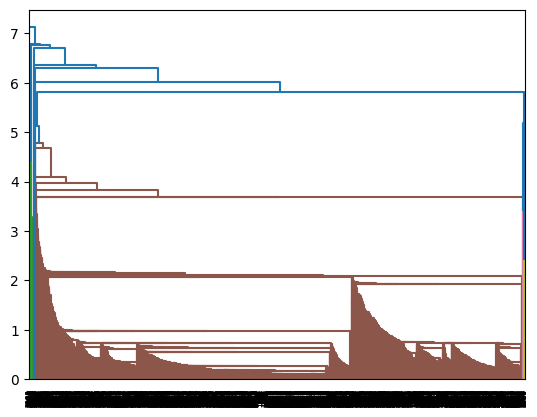

In [ ]:
dendrogram = sch.dendrogram(sch.linkage(stand_data, method='single'))

In [ ]:
hc = AgglomerativeClustering(n_clusters=3, metric = 'euclidean', linkage = 'single')   #Hieararchial clustering with complete linkage

In [ ]:
y_hc = hc.fit_predict(stand_data)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [ ]:
stand_data['h_clusterid'] = hc.labels_

In [ ]:
stand_data['h_clusterid'].value_counts()

,count
h_clusterid,
0,3983
2,15
1,1


### Silhouette score

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_score(stand_data,hc.labels_)

0.7340742490198198

### Visualization of Hieararchial Clustering Result

<Axes: xlabel='Flight_trans_12', ylabel='Qual_miles'>

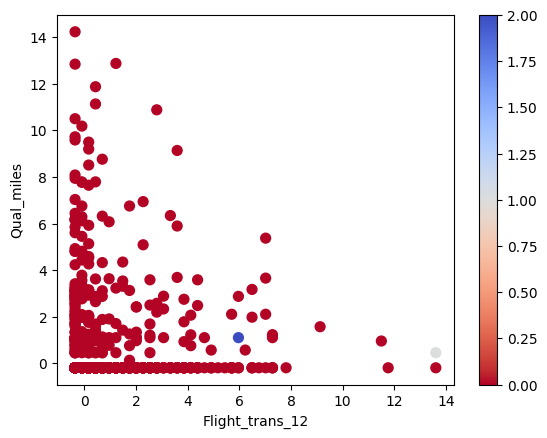

In [ ]:
stand_data.plot(x="Flight_trans_12",y="Qual_miles",c=hc.labels_,kind="scatter",s=50,cmap=plt.cm.coolwarm_r)

In [ ]:
stand_data.drop(['h_clusterid'],axis=1,inplace=True)

### KMeans Clustering

In [ ]:
from sklearn.cluster import KMeans

### Elbow curve

<function matplotlib.pyplot.show(close=None, block=None)>

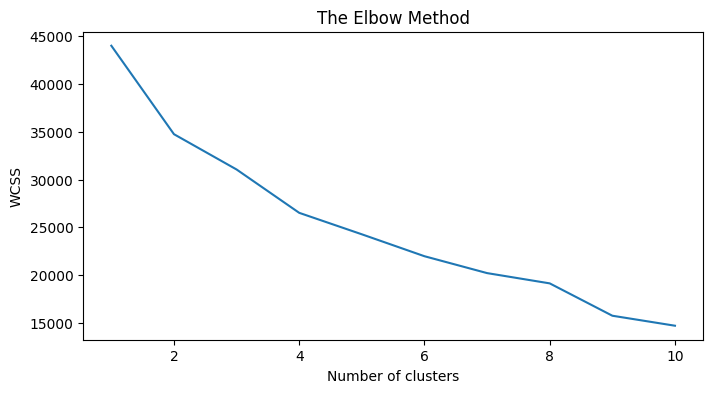

In [ ]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
fig=plt.figure(figsize=(8,4))
WCSS=[]
for i in range(1,11):
  model=KMeans(n_clusters=i).fit(stand_data)
  WCSS.append(model.inertia_)
plt.plot(range(1,11),WCSS)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show

Elbow curve is very useful to find the best n_clusters.

In [ ]:
model1=KMeans(n_clusters=4).fit(stand_data)

In [ ]:
labels=model1.predict(stand_data)

### Silhouette score

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_score(stand_data,labels)

0.3215945528608255

### Visualization of KMeans Clustering Result

<Axes: xlabel='Flight_trans_12', ylabel='Qual_miles'>

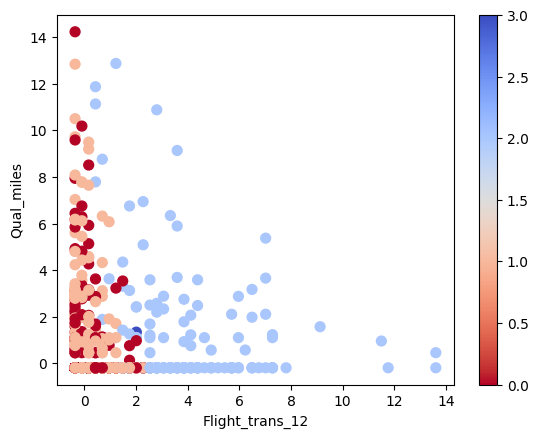

In [ ]:
stand_data.plot(x="Flight_trans_12",y="Qual_miles",c=model1.labels_,kind="scatter",s=50,cmap=plt.cm.coolwarm_r)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Balance            3999 non-null   int64  
 1   Qual_miles         3999 non-null   int64  
 2   cc1_miles          3999 non-null   int64  
 3   cc2_miles          3999 non-null   int64  
 4   cc3_miles          3999 non-null   int64  
 5   Bonus_miles        3999 non-null   float64
 6   Bonus_trans        3999 non-null   int64  
 7   Flight_miles_12mo  3999 non-null   int64  
 8   Flight_trans_12    3999 non-null   int64  
 9   Days_since_enroll  3999 non-null   int64  
 10  Award?             3999 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 343.8 KB


### DBSCAN Clustering

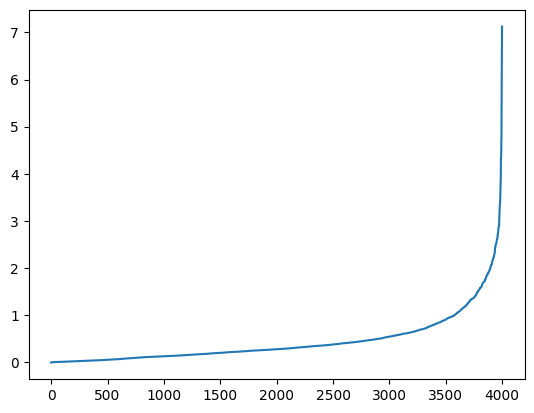

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
neigh=NearestNeighbors(n_neighbors=22)
nbrs=neigh.fit(stand_data)
distances,indices=nbrs.kneighbors(stand_data)
distances=np.sort(distances,axis=0)
distances=distances[:,1]
plt.plot(distances)

This curve is useful to find the best epsulon value.

In [ ]:
model=DBSCAN(eps=2.65,min_samples=16).fit(stand_data)    #min_smaples=2*n_features

In [ ]:
model.labels_

array([0, 0, 0, ..., 0, 0, 0])

### Silhouette score

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_score(stand_data,model.labels_)

0.5344006130146846

### Visualization of DBScan Clustering Result

<Axes: xlabel='Flight_trans_12', ylabel='Qual_miles'>

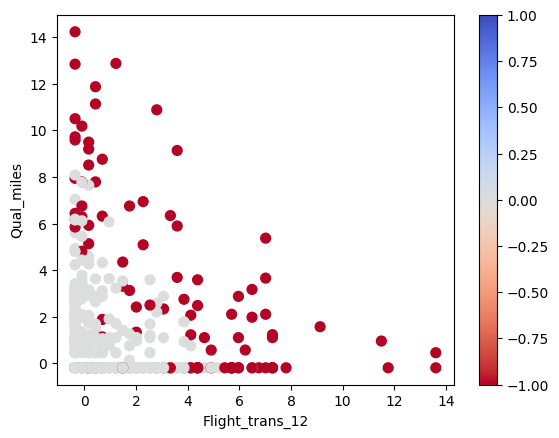

In [ ]:
stand_data.plot(x="Flight_trans_12",y="Qual_miles",c=model.labels_,kind="scatter",s=50,cmap=plt.cm.coolwarm_r)

# Clustering Analysis and Interpretation

By applying the three types of clustering techniques(Hieararchial clustering,Kmeans Clustering and DBscan),it was found that Hieararchial clustering giving the best silhouette score among all.

In the Hiearchial clustering, the linkage single was giving the best silhouette score compares to remaining linkages.

### Pros of Hiearchial Clustering :



1.   Good for small datasets
2.   Doesn’t need the number of clusters in advance

1.   The dendrogram gives a nice hierarchical view of clusters.





### Pros of KMeans Clustering:-



1.   Efficient for large datasets
2.   Simple and easy to implement(we will get the best K value)

1.   Works well for spherical clusters





### Pros of DBScan Clustering :-



1.   No need to specify the number of clusters
2.   Resistant to outliers

